In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import plotly.express as px

import re
import unicodedata
import nltk

import prepare as p

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('clean_scraped_data.csv')

In [3]:
df = p.map_other_languages(df)

In [4]:
df = df.drop(columns = 'Unnamed: 0')

In [5]:
df

,repo,language,readme_contents,clean,lemmatized
0,fogleman/Minecraft,Python,# Minecraft\n\nSimple Minecraft-inspired demo ...,minecraft simple minecraftinspired demo writte...,minecraft simple minecraftinspired demo writte...
1,itzg/docker-minecraft-server,Other,[![Docker Pulls](https://img.shields.io/docker...,docker pullshttpsimgshieldsiodockerpullsitzgmi...,docker pullshttpsimgshieldsiodockerpullsitzgmi...
2,overviewer/Minecraft-Overviewer,Python,====================================\nMinecraf...,minecraft overviewer build status andrew brown...,minecraft overviewer build status andrew brown...
3,TheGreyGhost/MinecraftByExample,Java,MinecraftByExample [1.16.4]\n=================...,minecraftbyexample 1164 purpose minecraftbyexa...,minecraftbyexample 1164 purpose minecraftbyexa...
4,minecraft-dev/MinecraftDev,Other,"<p align=""center""><a href=""https://minecraftde...",p aligncentera hrefhttpsminecraftdevorgimg src...,p aligncentera hrefhttpsminecraftdevorgimg src...
...,...,...,...,...,...
879,Crossroads-Development/Crossroads,Java,# Crossroads\n\nA steampunk technology mod for...,crossroads steampunk technology mod minecraft ...,crossroad steampunk technology mod minecraft i...
880,GeyserMC/PacketLib,Java,# PacketLib\nPacketLib is a library for packet...,packetlib packetlib library packetbased networ...,packetlib packetlib library packetbased networ...
881,Nic4Las/Minecraft-Enderite-Mod,Java,# Enderite Mod\n\n[![](http://cf.way2muchnoise...,enderite mod httpcfway2muchnoiseeuversions3992...,enderite mod httpcfway2muchnoiseeuversions3992...
882,espertus/blockly-lua,JavaScript,Blockly Lua allows you to program ComputerCraf...,blockly lua allows program computercraft turtl...,blockly lua allows program computercraft turtl...


In [ ]:
df.language.value_counts()

In [11]:
def split_minecraft_data(df):
    '''
    This function performs split on minecraft repo data, stratified on language.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.language)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.language)
    return train, validate, test



In [ ]:
train, validate, test = split_minecraft_data(df)

In [ ]:
train.language.value_counts()

In [ ]:
validate.language.value_counts()

In [ ]:
test.language.value_counts()

In [ ]:
y_train = train[['language']]

In [ ]:
y_train

In [ ]:
X_train = train[['lemmatized']]

In [ ]:
X_train

# Making split() word lists with target variables

In [ ]:
all_minecraft_readme = ' '.join(train['lemmatized'])

In [ ]:
all_word_freq = pd.Series(all_minecraft_readme.split()).value_counts()

### Python

In [ ]:
python_df = train[train.language == 'Python']

In [ ]:
#python_df

In [ ]:
all_python_readme = ' '.join(python_df['lemmatized'])
pd.Series(all_python_readme.split()).value_counts().head(20)

In [ ]:
python_word_freq = pd.Series(all_python_readme.split()).value_counts()

In [ ]:
python_word_freq

### Java

In [ ]:
java_df = train[train.language == 'Java']
all_java_readme = ' '.join(java_df['lemmatized'])
pd.Series(all_java_readme.split()).value_counts().head(20)

In [ ]:
java_word_freq = pd.Series(all_java_readme.split()).value_counts()

### JavaScript

In [ ]:
javascript_df = train[train.language == 'JavaScript']
all_javascript_readme = ' '.join(javascript_df['lemmatized'])
pd.Series(all_javascript_readme.split()).value_counts().head(20)

In [ ]:
javascript_word_freq = pd.Series(all_javascript_readme.split()).value_counts()

# Create bigrams

In [ ]:
all_minecraft_readme_bigrams = (pd.Series(nltk.ngrams(all_minecraft_readme.split(), 2))
                      .value_counts())

all_minecraft_readme_bigrams.head(20)

### Python

In [ ]:
top_20_all_python_readme_bigrams = (pd.Series(nltk.ngrams(all_python_readme.split(), 2))
                      .value_counts()
                      .head(20))

pybi_df = pd.DataFrame(top_20_all_python_readme_bigrams) #.head(20)

#pybi_df = pd.DataFrame(pybi_df, columns=['Bigram', 'Count'])



In [ ]:
pybi_df.columns = ['Count']
pybi_df.index.name = 'Bigram'
pybi_df

In [ ]:
list(pybi_df.index)

### Java

In [ ]:
top_20_all_java_readme_bigrams = (pd.Series(nltk.ngrams(all_java_readme.split(), 2))
                      .value_counts()
                      .head(20))

top_20_all_java_readme_bigrams.head(20)

### JavaScript

In [ ]:
top_20_all_javascript_readme_bigrams = (pd.Series(nltk.ngrams(all_javascript_readme.split(), 2))
                      .value_counts()
                      .head(20))

top_20_all_javascript_readme_bigrams.head(20)

# Create Trigrams

### Python

In [ ]:
top_20_all_python_readme_trigrams = (pd.Series(nltk.ngrams(all_python_readme.split(), 3))
                      .value_counts()
                      .head(20))

top_20_all_python_readme_trigrams.head(20)

### Java

In [ ]:
top_20_all_java_readme_trigrams = (pd.Series(nltk.ngrams(all_java_readme.split(), 3))
                      .value_counts()
                      .head(20))

top_20_all_java_readme_trigrams.head(20)

### JavaScript

In [ ]:
top_20_all_javascript_readme_trigrams = (pd.Series(nltk.ngrams(all_javascript_readme.split(), 3))
                      .value_counts()
                      .head(20))

top_20_all_javascript_readme_trigrams.head(20)

# Viz

word_counts = (pd.concat([all_word_freq, python_word_freq, java_word_freq, javascript_word_freq], axis=1, sort=True)
                .set_axis(['all', 'python', 'java', 'javascript'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))


In [ ]:
top_20_all_python_readme_bigrams.sort_values(ascending=False).plot.barh(color='purple', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Python bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_all_python_readme_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

In [ ]:
fig = px.histogram(pybi_df, x='Count', template='plotly_white', title='Top 20 Bigram Count for Python')
fig.update_xaxes(categoryorder='total descending').update_yaxes(title='Bigrams')
fig.show()

In [ ]:
pybi_df

In [6]:
df

,repo,language,readme_contents,clean,lemmatized
0,fogleman/Minecraft,Python,# Minecraft\n\nSimple Minecraft-inspired demo ...,minecraft simple minecraftinspired demo writte...,minecraft simple minecraftinspired demo writte...
1,itzg/docker-minecraft-server,Other,[![Docker Pulls](https://img.shields.io/docker...,docker pullshttpsimgshieldsiodockerpullsitzgmi...,docker pullshttpsimgshieldsiodockerpullsitzgmi...
2,overviewer/Minecraft-Overviewer,Python,====================================\nMinecraf...,minecraft overviewer build status andrew brown...,minecraft overviewer build status andrew brown...
3,TheGreyGhost/MinecraftByExample,Java,MinecraftByExample [1.16.4]\n=================...,minecraftbyexample 1164 purpose minecraftbyexa...,minecraftbyexample 1164 purpose minecraftbyexa...
4,minecraft-dev/MinecraftDev,Other,"<p align=""center""><a href=""https://minecraftde...",p aligncentera hrefhttpsminecraftdevorgimg src...,p aligncentera hrefhttpsminecraftdevorgimg src...
...,...,...,...,...,...
879,Crossroads-Development/Crossroads,Java,# Crossroads\n\nA steampunk technology mod for...,crossroads steampunk technology mod minecraft ...,crossroad steampunk technology mod minecraft i...
880,GeyserMC/PacketLib,Java,# PacketLib\nPacketLib is a library for packet...,packetlib packetlib library packetbased networ...,packetlib packetlib library packetbased networ...
881,Nic4Las/Minecraft-Enderite-Mod,Java,# Enderite Mod\n\n[![](http://cf.way2muchnoise...,enderite mod httpcfway2muchnoiseeuversions3992...,enderite mod httpcfway2muchnoiseeuversions3992...
882,espertus/blockly-lua,JavaScript,Blockly Lua allows you to program ComputerCraf...,blockly lua allows program computercraft turtl...,blockly lua allows program computercraft turtl...


In [32]:
def get_language_freq(train):
    '''
    This function takes in the training data set and creates a countplot
    utilizing Seaborn to visualize the range and values of programming
    languages in GitHub Repositories'''
    sns.set_style("darkgrid")
    fig, axes = plt.subplots(figsize=(9, 6))
    cpt = sns.countplot(x='language', data=train, palette='GnBu')
    plt.title('Java is the Most Common Language in our Dataset')
    plt.xlabel("Programming Language")
    plt.ylabel('Count of Languages')
    for tick in axes.xaxis.get_major_ticks():
        tick.label1.set_fontsize(10)
    plt.show()

In [26]:
extra_stops = ['server', 'run', '&#9;', "' ", " '", "'",'Minecraft','minecraft','minecraft ',' minecraft','abstract','and','arguments','assert','break','byte','case','char','class',
               'const','continue','default','double','else','enum','extends','false','final','finally','float','for',
               'goto','if','implements','import','in','instanceof','int','interface','long','native','new','null',
               'package','pass','private','protected','public','raise','return','short','static','super','switch',
               'synchronized','this','throw','throws','transient','true','try','void','volatile','while','with',
               'yield', 'http', 'com', 'github', 'www', 'version', 'file']

In [27]:
df_stops_out=p.prep_readme_data(df, 'readme_contents', extra_words= extra_stops, exclude_words=[])

Removed 151 stopwords
---
Removed 4745 stopwords
---
Removed 207 stopwords
---
Removed 505 stopwords
---
Removed 155 stopwords
---
Removed 76 stopwords
---
Removed 9 stopwords
---
Removed 1439 stopwords
---
Removed 208 stopwords
---
Removed 35 stopwords
---
Removed 336 stopwords
---
Removed 222 stopwords
---
Removed 243 stopwords
---
Removed 257 stopwords
---
Removed 177 stopwords
---
Removed 222 stopwords
---
Removed 102 stopwords
---
Removed 73 stopwords
---
Removed 204 stopwords
---
Removed 231 stopwords
---
Removed 10 stopwords
---
Removed 136 stopwords
---
Removed 13 stopwords
---
Removed 211 stopwords
---
Removed 676 stopwords
---
Removed 2218 stopwords
---
Removed 132 stopwords
---
Removed 585 stopwords
---
Removed 681 stopwords
---
Removed 206 stopwords
---
Removed 704 stopwords
---
Removed 130 stopwords
---
Removed 70 stopwords
---
Removed 117 stopwords
---
Removed 256 stopwords
---
Removed 1172 stopwords
---
Removed 128 stopwords
---
Removed 215 stopwords
---
Removed 74 stopw

In [28]:
df_rae.head()

,repo,language,readme_contents,clean,lemmatized
0,fogleman/Minecraft,Python,# Minecraft\n\nSimple Minecraft-inspired demo ...,simple minecraftinspired demo written python p...,simple minecraftinspired demo written python p...
1,itzg/docker-minecraft-server,Other,[![Docker Pulls](https://img.shields.io/docker...,docker pullshttpsimgshieldsiodockerpullsitzgmi...,docker pullshttpsimgshieldsiodockerpullsitzgmi...
2,overviewer/Minecraft-Overviewer,Python,====================================\nMinecraf...,overviewer build status andrew brown contribut...,overviewer build status andrew brown contribut...
3,TheGreyGhost/MinecraftByExample,Java,MinecraftByExample [1.16.4]\n=================...,minecraftbyexample 1164 purpose minecraftbyexa...,minecraftbyexample 1164 purpose minecraftbyexa...
4,minecraft-dev/MinecraftDev,Other,"<p align=""center""><a href=""https://minecraftde...",p aligncentera hrefhttpsminecraftdevorgimg src...,p aligncentera hrefhttpsminecraftdevorgimg src...


In [29]:
train, validate, test = split_minecraft_data(df_rae)

In [30]:
python_df = train[train['language']=='Python']

In [31]:
python_df.head()

,repo,language,readme_contents,clean,lemmatized
538,Mekolaos/Aternos-On-Discord,Python,# Aternos On Discord \n[![Build Status](https:...,aternos discord build statushttpstraviscicomme...,aternos discord build statushttpstraviscicomme...
22,Hawstein/PyMinecraft,Python,# Minecraft\n\n这是用Python和Pyglet写的简单的Minecraft游...,pythonpygletminecraft httpsgithubcomfoglemanmi...,pythonpygletminecraft httpsgithubcomfoglemanmi...
594,GreenTurtwig/MinecraftServer-HA,Python,"# Minecraft Server Home Assistant Sensor\n""Now...",home assistant sensor flash living room lights...,home assistant sensor flash living room light ...
505,martinsik/minecraft-dynmap-timemachine,Python,# Minecraft Dynmap Time Machine\n\n[![Build St...,dynmap time machine build statushttpstraviscio...,dynmap time machine build statushttpstraviscio...
697,Podshot/MCEdit-Unified,Python,# MCEdit-Unified\n\nMCEdit-Unified is an updat...,mceditunified mceditunified updated fork origi...,mceditunified mceditunified updated fork origi...


# Python Viz

In [55]:
def get_top10_python(train):
    '''
    This function takes in a train dataset, creates a df for
    the Python coding language, then plots the 10 most frequently
    used words in the column labeled 'language'
    '''
    python_df = train[train['language']=='Python']
    python_txt = ' '.join(python_df['lemmatized'])
    python_txt = pd.Series(python_txt.split()).value_counts().head(10)
    
    sns.set_style("darkgrid")
    python_txt.sort_values(ascending=False).plot.barh(color='#4B8BBE', width=.9, figsize=(10, 6))

    plt.title('10 Most frequently occuring Python strings')
    plt.ylabel('Strings')
    plt.xlabel('# Occurances')

    # make the labels pretty
    ticks, _ = plt.yticks()
    labels = python_txt.reset_index()['index']
    _ = plt.yticks(ticks, labels)
    
    plt.show()


In [33]:
python_df = train[train['language']=='Python']
python_txt = ' '.join(python_df['lemmatized'])
python_txt = pd.Series(python_txt.split()).value_counts().head(10)

In [34]:
python_txt

install    134
python     122
use         89
world       72
0           61
image       61
chunk       59
using       57
make        56
block       55
dtype: int64

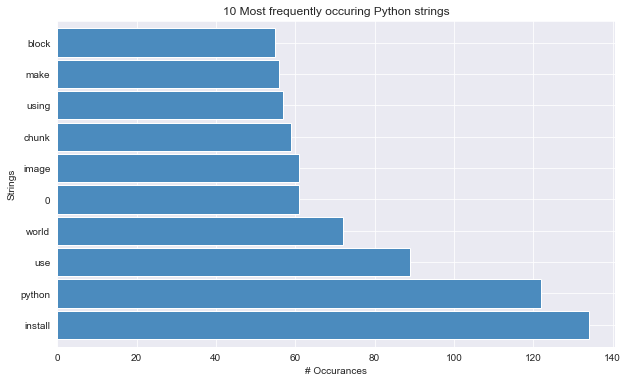

In [35]:
sns.set_style("darkgrid")
python_txt.sort_values(ascending=False).plot.barh(color='#4B8BBE', width=.9, figsize=(10, 6))

plt.title('10 Most frequently occuring Python strings')
plt.ylabel('Strings')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = python_txt.reset_index()['index'] #.apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

# Java Viz

In [56]:
def get_top10_java(train):
    '''
    This function takes in a train dataset, creates a df for
    the Java coding language, then plots the 10 most frequently
    used words in the column labeled 'language'
    '''
    java_df = train[train.language == 'Java']
    java_txt = ' '.join(java_df['lemmatized'])
    java_txt = pd.Series(java_txt.split()).value_counts().head(10)
    
    sns.set_style("darkgrid")
    java_txt.sort_values(ascending=False).plot.barh(color='#f89820', width=.9, figsize=(10, 6))

    plt.title('10 Most frequently occuring Java strings')
    plt.ylabel('Strings')
    plt.xlabel('# Occurances')

    # make the labels pretty
    ticks, _ = plt.yticks()
    labels = java_txt.reset_index()['index']
    _ = plt.yticks(ticks, labels)
    
    plt.show()

In [36]:
java_df = train[train.language == 'Java']
java_txt = ' '.join(java_df['lemmatized'])
java_txt = pd.Series(java_txt.split()).value_counts().head(10)

In [37]:
java_txt

mod        525
build      339
use        298
project    245
code       233
player     220
support    194
issue      180
feature    171
command    167
dtype: int64

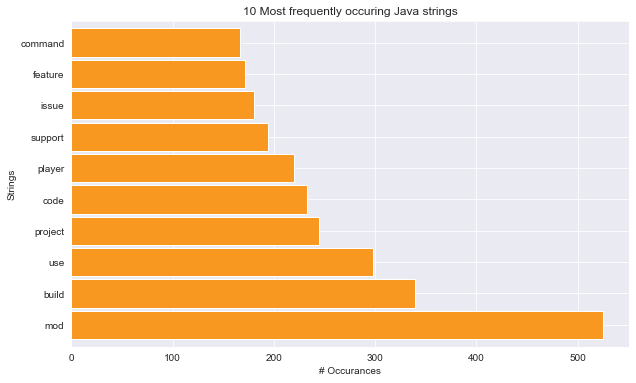

In [38]:
sns.set_style("darkgrid")
java_txt.sort_values(ascending=False).plot.barh(color='#f89820', width=.9, figsize=(10, 6))

plt.title('10 Most frequently occuring Java strings')
plt.ylabel('Strings')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = java_txt.reset_index()['index']
_ = plt.yticks(ticks, labels)

# JS Viz

In [53]:
def get_top10_js(train):
    '''
    This function takes in a train dataset, creates a df for
    the JavaScript coding language, then plots the 10 most frequently
    used words in the column labeled 'language'
    '''
    js_df = train[train.language == 'JavaScript']
    js_txt = ' '.join(js_df['lemmatized'])
    js_txt = pd.Series(js_txt.split()).value_counts().head(10)
    
    sns.set_style("darkgrid")
    js_txt.sort_values(ascending=False).plot.barh(color='#F0DB4F', width=.9, figsize=(10, 6))

    plt.title('10 Most frequently occuring JavaScript strings')
    plt.ylabel('Strings')
    plt.xlabel('# Occurances')

    # make the labels pretty
    ticks, _ = plt.yticks()
    labels = js_txt.reset_index()['index']
    
    plt.show()

In [39]:
js_df = train[train.language == 'JavaScript']
js_txt = ' '.join(js_df['lemmatized'])
js_txt = pd.Series(js_txt.split()).value_counts().head(10)

In [40]:
js_txt

command    153
backup      82
test        74
start       74
say         64
set         64
werden      64
install     61
npm         61
block       61
dtype: int64

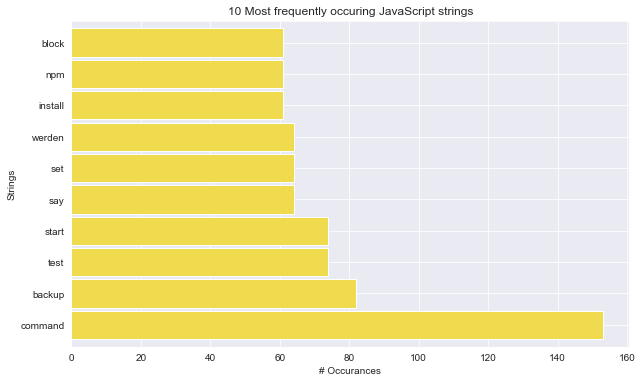

In [41]:
sns.set_style("darkgrid")
js_txt.sort_values(ascending=False).plot.barh(color='#F0DB4F', width=.9, figsize=(10, 6))

plt.title('10 Most frequently occuring JavaScript strings')
plt.ylabel('Strings')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = js_txt.reset_index()['index'] #.apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

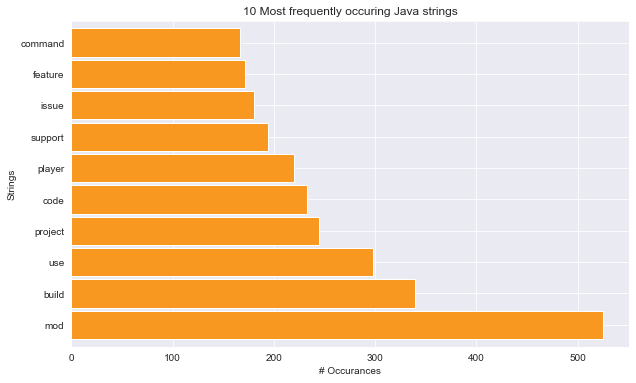

In [46]:
get_top10_java(train)

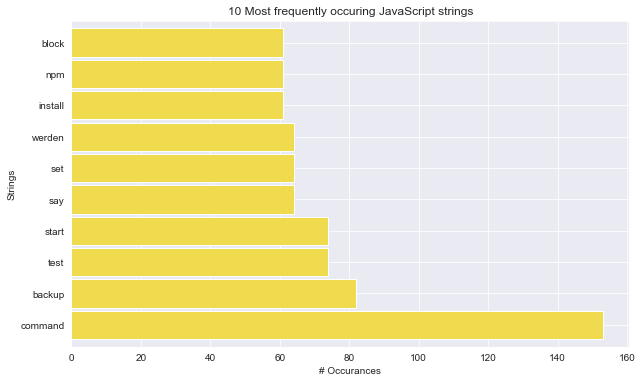

In [50]:
get_top10_js(train)